# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,83,79,40,80,133,55,7,147,47,19,135,172,311,144,76,8,30,181,193
1,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
2,829,95,49,82,139,56,11,159,43,20,162,173,365,185,75,7,10,182,191
3,140,90,37,80,171,58,9,157,42,20,132,172,373,115,60,3,18,201,209
4,405,88,40,73,173,68,7,150,44,19,137,174,341,151,69,2,20,196,200
5,66,81,43,68,125,57,8,149,46,19,146,169,323,172,83,6,18,179,184
6,179,89,44,70,137,58,6,136,49,18,146,168,273,166,78,10,3,186,187
7,430,104,53,108,206,61,11,217,31,24,168,226,694,209,67,0,9,188,201
8,219,85,39,57,126,56,6,114,58,17,135,134,195,145,64,17,7,197,202
9,696,89,38,82,156,59,8,153,43,19,129,179,351,137,70,1,1,187,192


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.413479,93.566485,44.885246,81.932605,168.435337,61.471767,8.480874,168.637523,40.981785,20.575592,148.047359,188.264117,438.648452,174.979964,72.475410,6.349727,12.451730,188.808743,195.491803
std,246.289994,8.162226,6.141247,16.092485,33.258251,6.886305,4.085100,32.936260,7.821202,2.558838,14.537691,30.806990,174.446932,32.261613,7.106453,4.991755,8.968108,6.110437,7.417824
min,1.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,410.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,623.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,598.000000,197.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,306.000000,126.000000,52.000000,262.000000,61.000000,28.000000,188.000000,287.000000,998.000000,268.000000,127.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [6]:
### YOUR CODE HERE

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [52]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

print ('Logistic regression results for original data:')
lr_clf = LogisticRegression()
parametrs = {'C': np.linspace(0.01, 1, 10),'penalty': ['l1','l2']} # какие?
clf = GridSearchCV(lr_clf, parametrs, scoring='accuracy', cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
C = clf.best_params_['C']
penalty = clf.best_params_['penalty']
print (clf.best_params_)

best_lr_clf = LogisticRegression(penalty=penalty, C=C)
best_lr_clf.fit(X_train, y_train)
y_predict = best_lr_clf.predict(X_test)
print(classification_report(y_test, y_predict, target_names=target_names))
print("accuracy_test = ", accuracy_score(y_test,y_predict))
print("f1_score_test = ", f1_score(y_test,y_predict,average='micro')) # read about average

# ROC

Logistic regression results for original data:
{'C': 0.23, 'penalty': 'l2'}
accuracy_test =  0.797979797979798
f1_score_test =  0.7979797979797979


2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

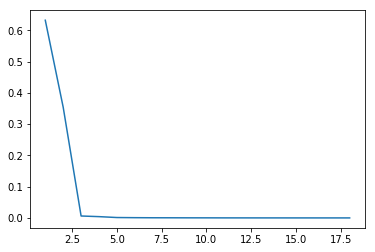

In [44]:
### YOUR CODE HERE
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

pca = decomposition.PCA(n_components=18)
pca.fit(X_train)
eva = pca.explained_variance_ratio_ # Percentage of variance explained by each of the selected components.
    
plt.plot(range(1,19), eva)
plt.show()
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# http://rcs.chemometrics.ru/Tutorials/pca.htm
# Метод главных компонент – это итерационная процедура, в которой новые компоненты добавляются последовательно, 
# одна за другой. Важно знать, когда остановить этот процесс, т.е. как определить правильное число главных компонент,
# A. Если это число слишком мало, то описание данных будет не полным. С другой стороны, избыточное число главных
# компонент приводит к переоценке, т.е. к ситуации, когда моделируется шум, а не содержательная информация.

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [51]:
### YOUR CODE HERE
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

best_components = 16
pca = decomposition.PCA(n_components=best_components)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
pca.fit(X_test)
X_test_PCA = pca.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [53]:
### YOUR CODE HERE
#  выглядит как 2.1
print ('Logistic regression results for transformed data:')
lr_clf = LogisticRegression()
parametrs = {'C': np.linspace(0.01, 1, 10),'penalty': ['l1','l2']} # какие?
clf = GridSearchCV(lr_clf, parametrs, scoring='accuracy', cv=5, n_jobs=-1)
clf.fit(X_train_PCA, y_train)
C = clf.best_params_['C']
penalty = clf.best_params_['penalty']
print (clf.best_params_)

best_lr_clf = LogisticRegression(penalty=penalty, C=C)
best_lr_clf.fit(X_train_PCA, y_train)
y_predict = best_lr_clf.predict(X_test_PCA)
print("accuracy_test = ", accuracy_score(y_test,y_predict))
print("f1_score_test = ", f1_score(y_test,y_predict,average='micro'))

Logistic regression results for transformed data:
{'C': 0.78, 'penalty': 'l1'}
accuracy_test =  0.5353535353535354
f1_score_test =  0.5353535353535354


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [56]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
print ('Decision tree results for original data:')
dt_clf = DecisionTreeClassifier()
parametrs = {'max_depth': range(1,5)} # какие?
clf = GridSearchCV(dt_clf, parametrs, scoring='accuracy', cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
max_depth_orig = clf.best_params_['max_depth']
print (clf.best_params_)

best_dt_clf_orig = DecisionTreeClassifier(max_depth=max_depth_orig)
best_dt_clf_orig.fit(X_train, y_train)
y_predict = best_dt_clf_orig.predict(X_test)
print("accuracy_test = ", accuracy_score(y_test,y_predict))
print("f1_score_test = ", f1_score(y_test,y_predict,average='micro'))

# 'на исходных и преобразованных данных' =>
print ('\nDecision tree results for transformed data:')
dt_clf = DecisionTreeClassifier()
parametrs = {'max_depth': range(1,5)} # какие?
clf = GridSearchCV(dt_clf, parametrs, scoring='accuracy', cv=5, n_jobs=-1)
clf.fit(X_train_PCA, y_train)
max_depth_modif = clf.best_params_['max_depth']
print (clf.best_params_)

best_dt_clf_modif = DecisionTreeClassifier(max_depth=max_depth_modif)
best_dt_clf_modif.fit(X_train_PCA, y_train)
y_predict = best_dt_clf_modif.predict(X_test_PCA)
print("accuracy_test = ", accuracy_score(y_test,y_predict))
print("f1_score_test = ", f1_score(y_test,y_predict,average='micro'))

Decision tree results for original data:
{'max_depth': 3}
accuracy_test =  0.632996632996633
f1_score_test =  0.632996632996633

Decision tree results for transformed data:
{'max_depth': 4}
accuracy_test =  0.5589225589225589
f1_score_test =  0.5589225589225589


#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [77]:
# YOUR CODE HERE
from sklearn.utils import resample

subsets = []
for i in range(0,50):
    subsets.append(resample(X_train, replace=True, n_samples=len(X_train), random_state=i))

best_dt_clf_orig.fit(X_train, y_train)
y_predict = best_dt_clf_orig.predict(X_test)

NameError: name 'best_dt_clf_orig' is not defined

## 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [173]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
rf_clf = RandomForestClassifier(n_estimators=50)


#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
# YOUR CODE HERE

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.